<a href="https://colab.research.google.com/github/AnshOhri7/Heart-failure-Prediction-ML-Project/blob/main/SL_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <h0><center><font color='green'>HEART FAILURE PREDICTION</font>

IMPORTING LIBRARIES

In [1]:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression 
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier

    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import accuracy_score
    from sklearn import metrics

    from pandas import plotting

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In [7]:
df=pd.read_csv(r'heart_failure_clinical_records_dataset.csv')
df.fillna(0, inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
#Basic statistical details
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
#Number of rows and columns(shape) of a dataset
df.shape

(299, 13)


## DATA PRE-PROCESSING

In [12]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no missing values


## DATA VISUALISATION


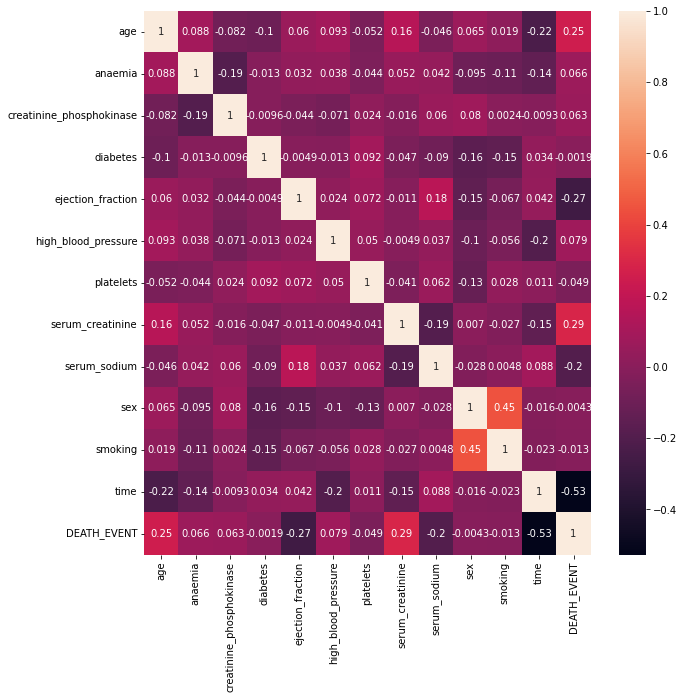

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Here, we can see that high_blood_pressure is correlating well as per heatmap. Here in this map, DEATH_EVENT is showing 0.093 (highest positive value) with relation to high_blood_pressure.

In [14]:
x = df.drop("DEATH_EVENT", axis=1)
y = df.DEATH_EVENT
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


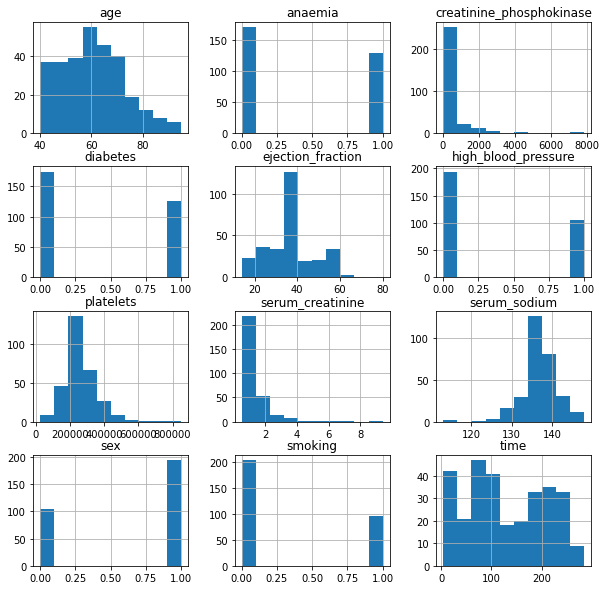

In [15]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = df.drop("DEATH_EVENT", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

They all show a very gaussian form so there is no need to normalize any feature.

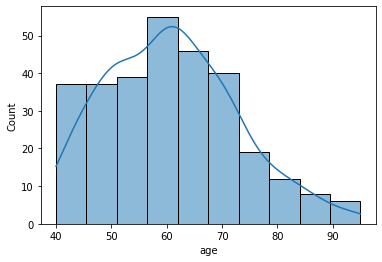

In [16]:
sns.histplot(df.age,kde = True)



## We representate the distribution of age variable by counting the number of observations that fall within disrete bins.

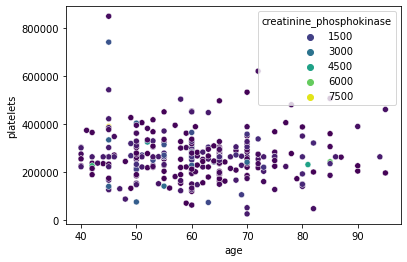

In [17]:
sns.scatterplot(data = df, x = "age",y = "platelets",hue="creatinine_phosphokinase",palette="viridis")


We use scatterplot to visualize and represent the values of two variables

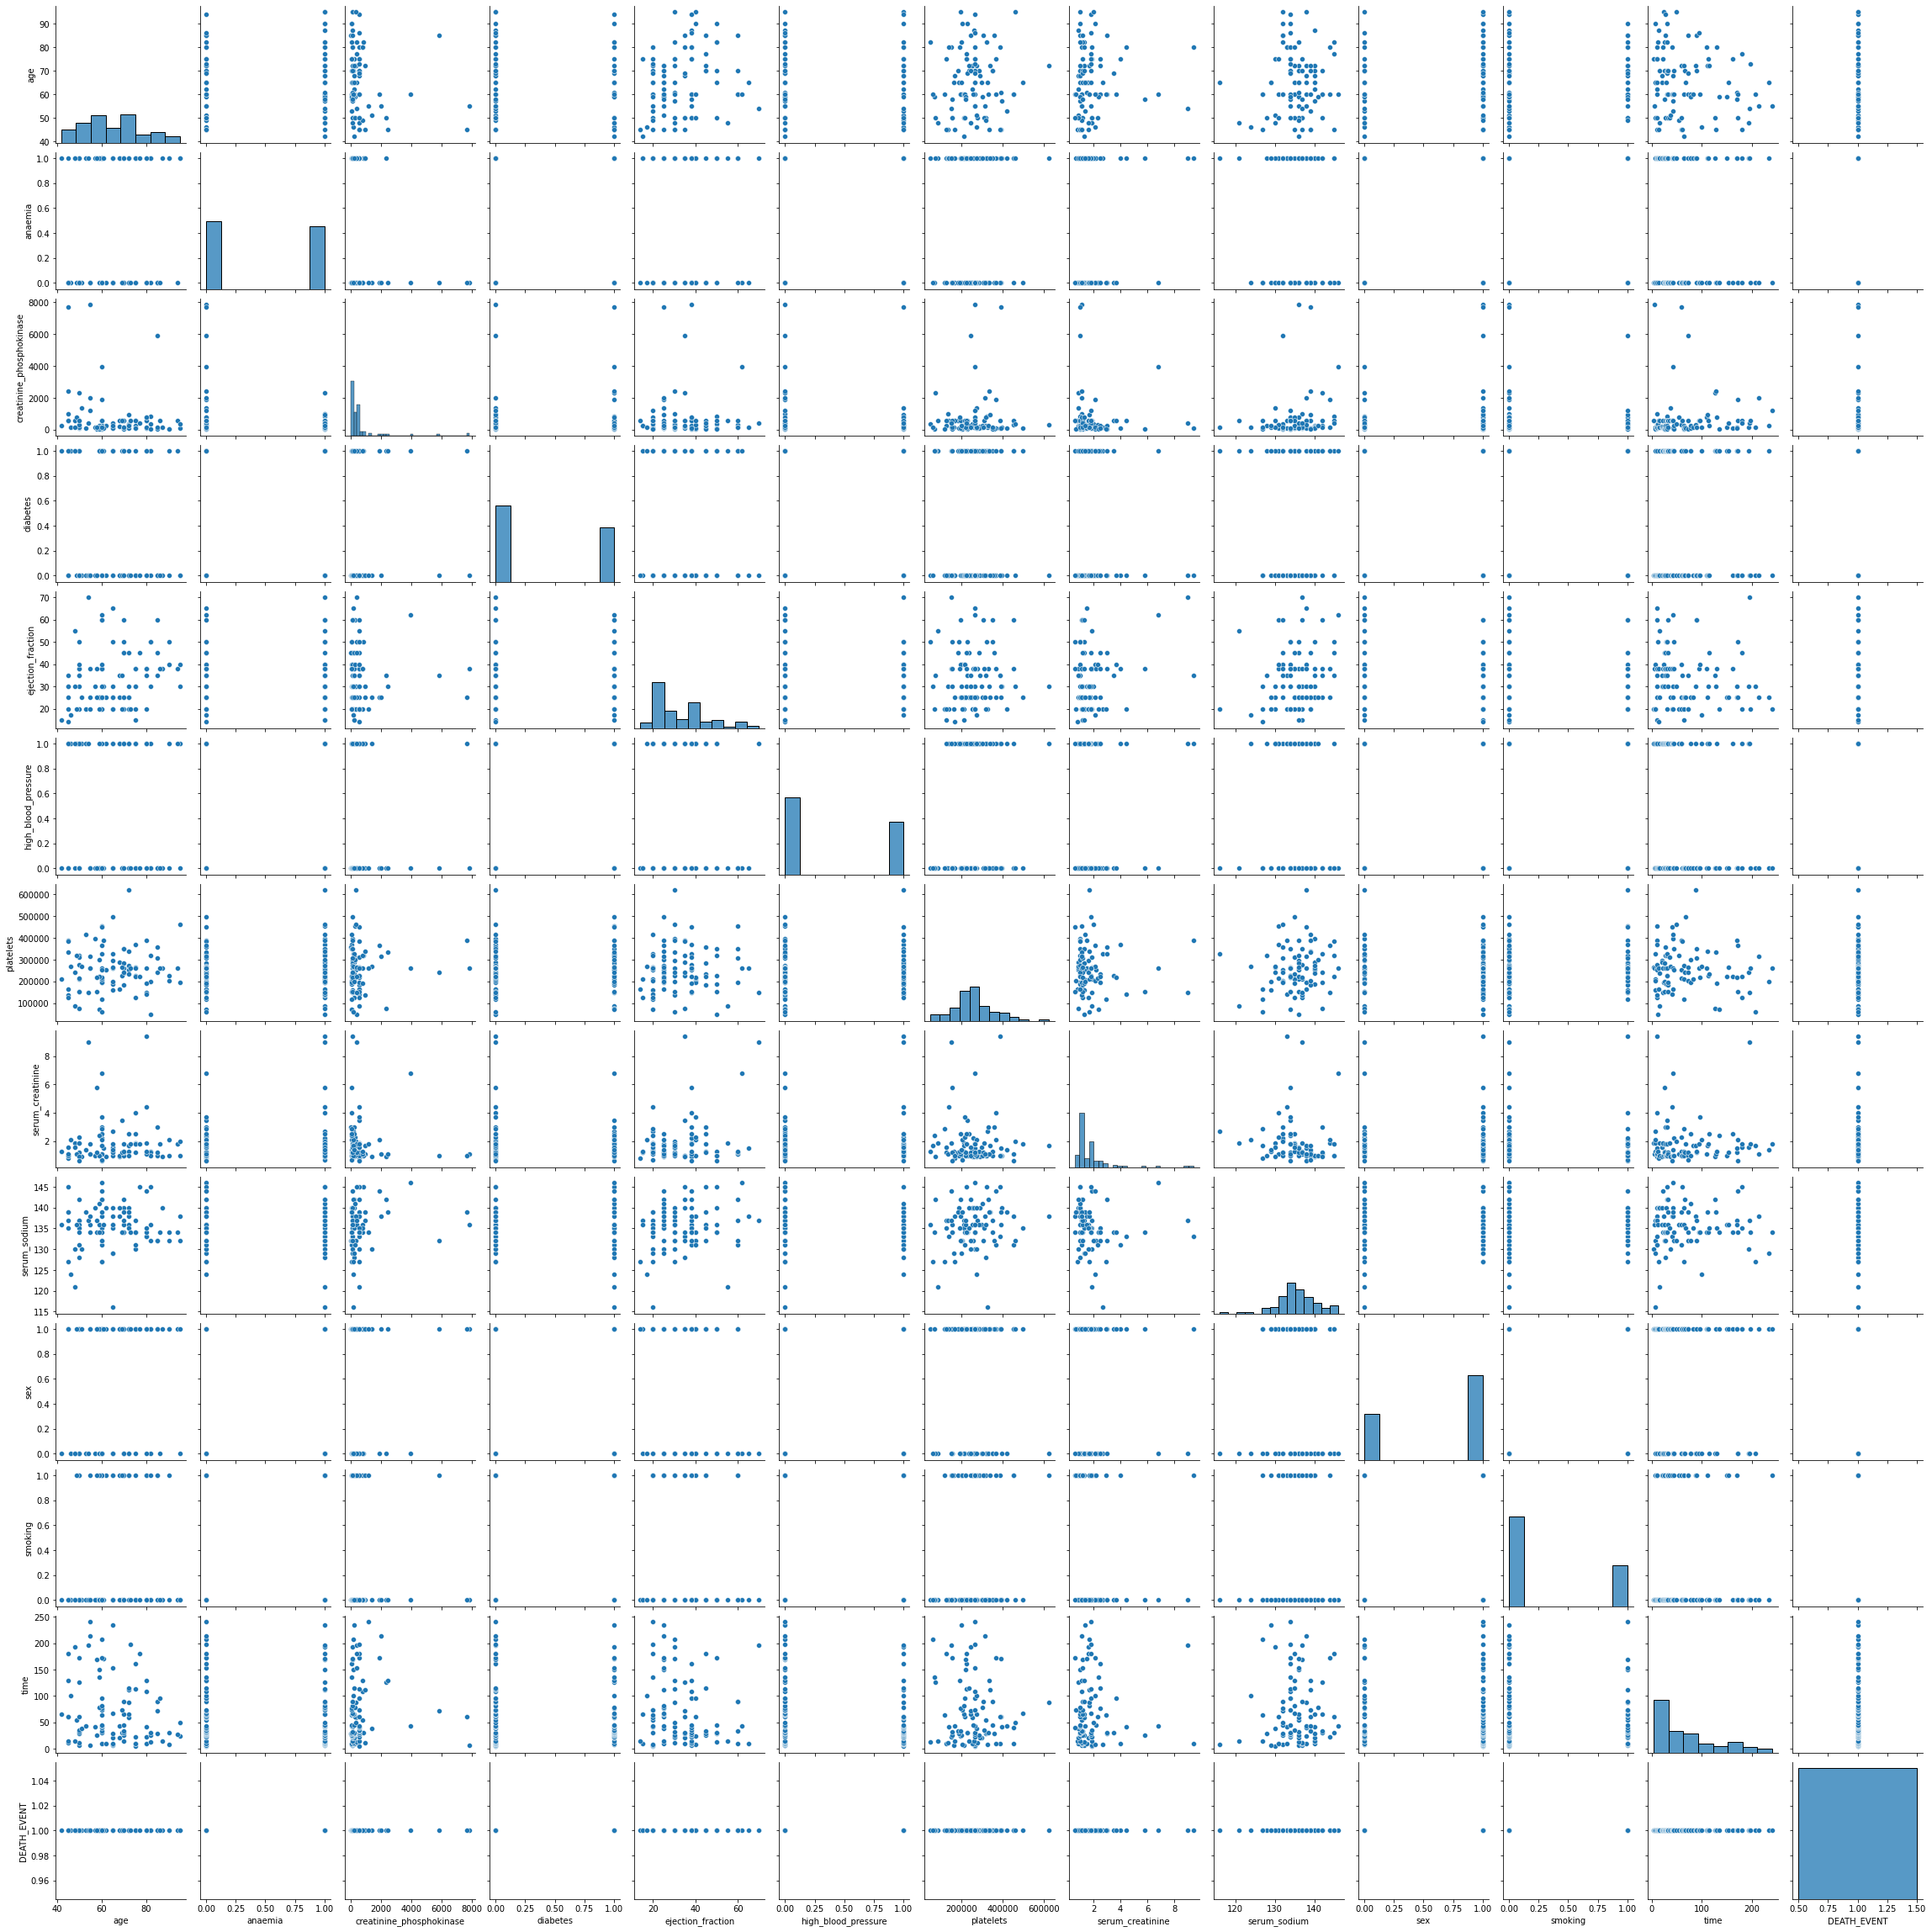

In [18]:

positive = df[df['DEATH_EVENT'] == 1]
sns.pairplot(positive)

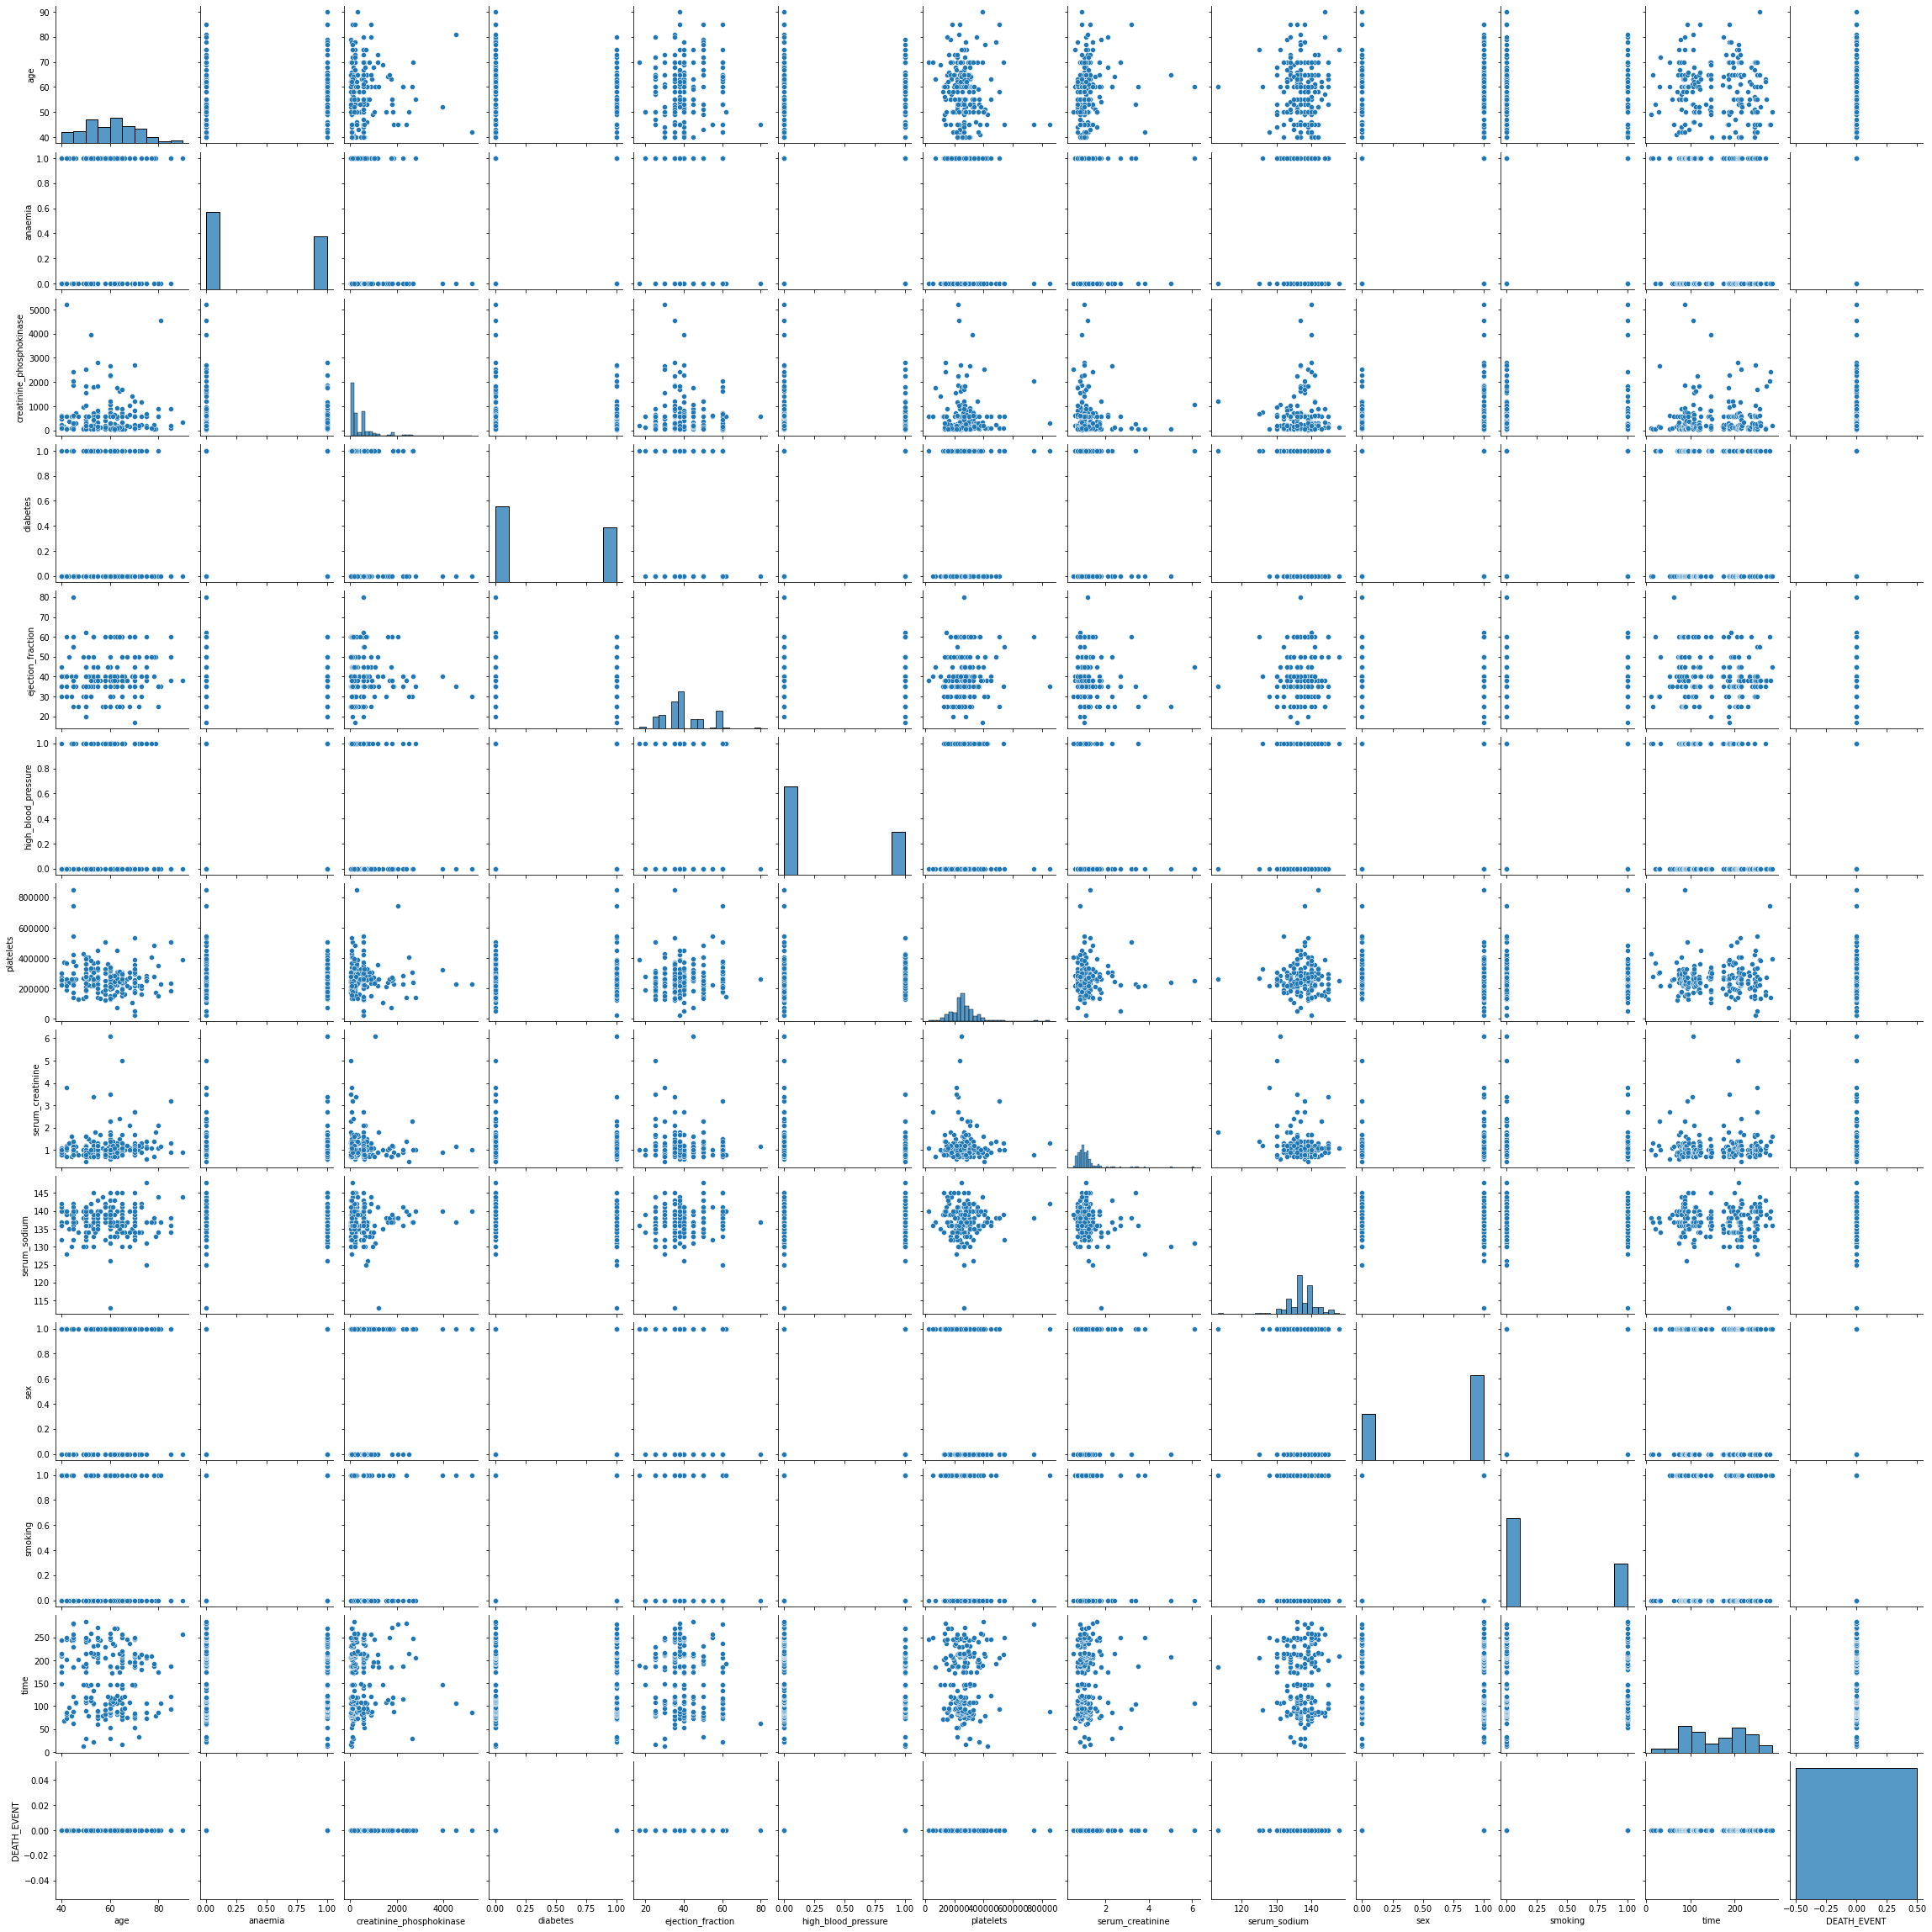

In [19]:
negative = df[df['DEATH_EVENT'] == 0]
sns.pairplot(negative) 

 Using pair plot we can see both the distribution of single variables and relationships between two variables.
 

## KNN (K-Nearest Neighbours)

In [20]:
X = df.drop(['DEATH_EVENT'],axis=1)
Y = df['DEATH_EVENT']
X_stdscle = StandardScaler().fit_transform(X.values)

In [21]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state = 0)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state = 0)
knn_cdf = KNeighborsClassifier(n_neighbors = 2,p=2,metric='minkowski')
knn_cdf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [23]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))

Train Accuracy :  82.775
Test Accuracy :  75.556


In [24]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_cdf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_cdf.predict(x_test)),5)))

Train Accuracy :  80.38300000000001
Test Accuracy :  70.0


## LOGISTIC REGRESSION

In [25]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))

Train Accuracy:  86.12
Test Accuracy: 81.11111111111111


## NAIVE BAYES

In [26]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
Y_pred = gaussian.predict(x_test)  
train_acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(x_test, Y_pred) * 100, 2)

In [27]:
print('Train Accuracy:',train_acc_gaussian)
print('Test Accuracy:',test_acc_gaussian)

Train Accuracy: 78.47
Test Accuracy: 100.0


## DECISION TREE

In [28]:

# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

Train accuracy: 85.17
Test Accuracy: 87.77777777777777


From the results obtained, Logistic Regression shows the best accuracy.